In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import networkx as nx
import os

In [2]:
def process_adoption_data(folder_name):
    datapath = f"../data/20_story_items/{folder_name}/"
    data = pd.read_csv(f"{datapath}/results.csv")

    with open(f"{datapath}/parameters.txt", 'r') as file:
        parameters = file.read()
        print(parameters)

    grouped_data = data.groupby(['Trial', 'agent', 'timestep'])
    
    def all_items_adopted(group):
        return group['adopted'].all()
    
    adopted_all_items = grouped_data.apply(all_items_adopted)
    adopted_all_items = adopted_all_items.reset_index(name='all_adopted')
    
    summary_data = adopted_all_items.groupby(['Trial', 'timestep']).all_adopted.sum().reset_index(name='whole_adopted')
    total_agents = data['agent'].nunique()
    summary_data['whole_adoption_ratio'] = summary_data['whole_adopted'] / total_agents
    
    max_timestep = summary_data['timestep'].max()
    adjusted_data = pd.DataFrame()
    
    for trial in summary_data['Trial'].unique():
        trial_data = summary_data[summary_data['Trial'] == trial]
        last_timestep = trial_data['timestep'].max()
        if last_timestep < max_timestep:
            additional_rows = pd.DataFrame({
                'Trial': trial,
                'timestep': range(last_timestep + 1, max_timestep + 1),
                'whole_adopted': trial_data.iloc[-1]['whole_adopted'],
                'whole_adoption_ratio': trial_data.iloc[-1]['whole_adoption_ratio']
            })
            trial_data = pd.concat([trial_data, additional_rows], ignore_index=True)
        
        adjusted_data = pd.concat([adjusted_data, trial_data], ignore_index=True)
    
    average_adjusted_adoption_data = adjusted_data.groupby('timestep').whole_adoption_ratio.mean().reset_index()
    return average_adjusted_adoption_data

# Using the function for each folder and assigning the result to variables
folders = ["lt_linear", "lt_binary", "lt_random", "sw_linear", "sw_binary", "sw_random"]

for folder in folders:
    variable_name = f"{folder}_data"
    globals()[variable_name] = process_adoption_data(folder)



alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



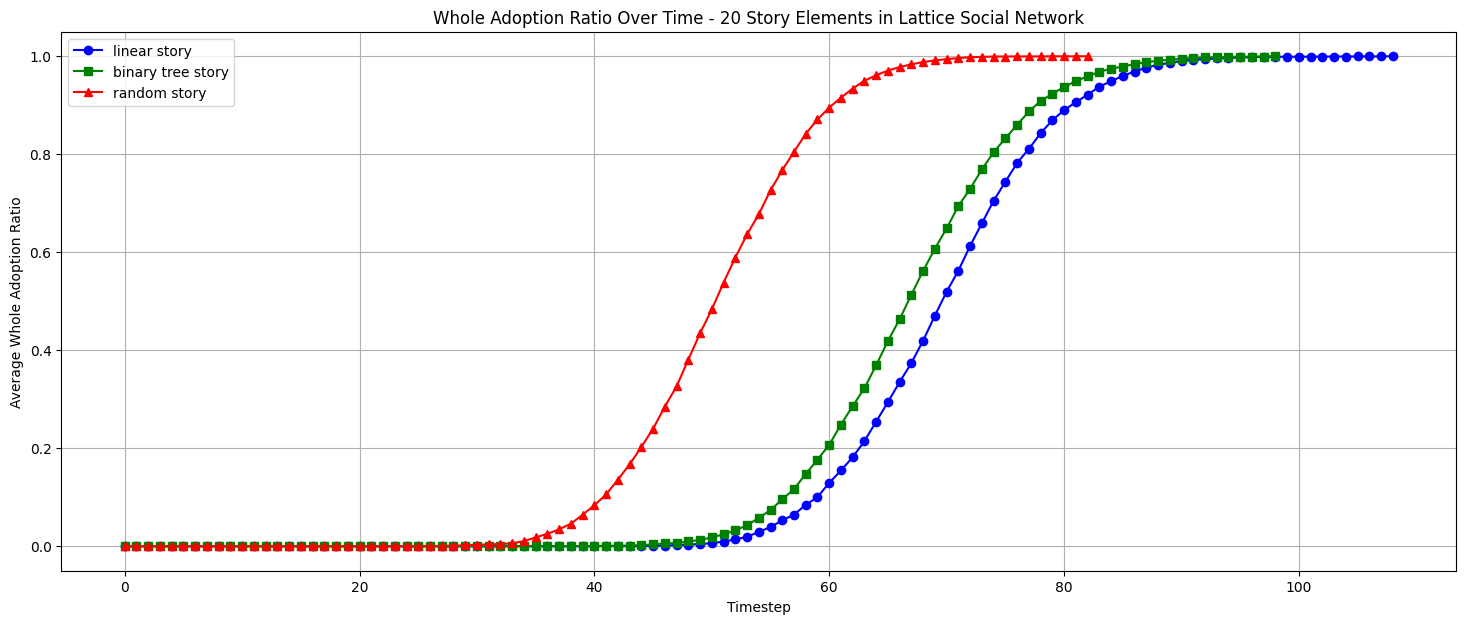

In [3]:
plt.figure(figsize=(18, 7))

plt.plot(lt_linear_data['timestep'], 
         lt_linear_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear story')

plt.plot(lt_binary_data['timestep'], 
         lt_binary_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary tree story')

plt.plot(lt_random_data['timestep'], 
         lt_random_data['whole_adoption_ratio'], 
         marker='^', color='red', label='random story')

plt.title('Whole Adoption Ratio Over Time - 20 Story Elements in Lattice Social Network')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

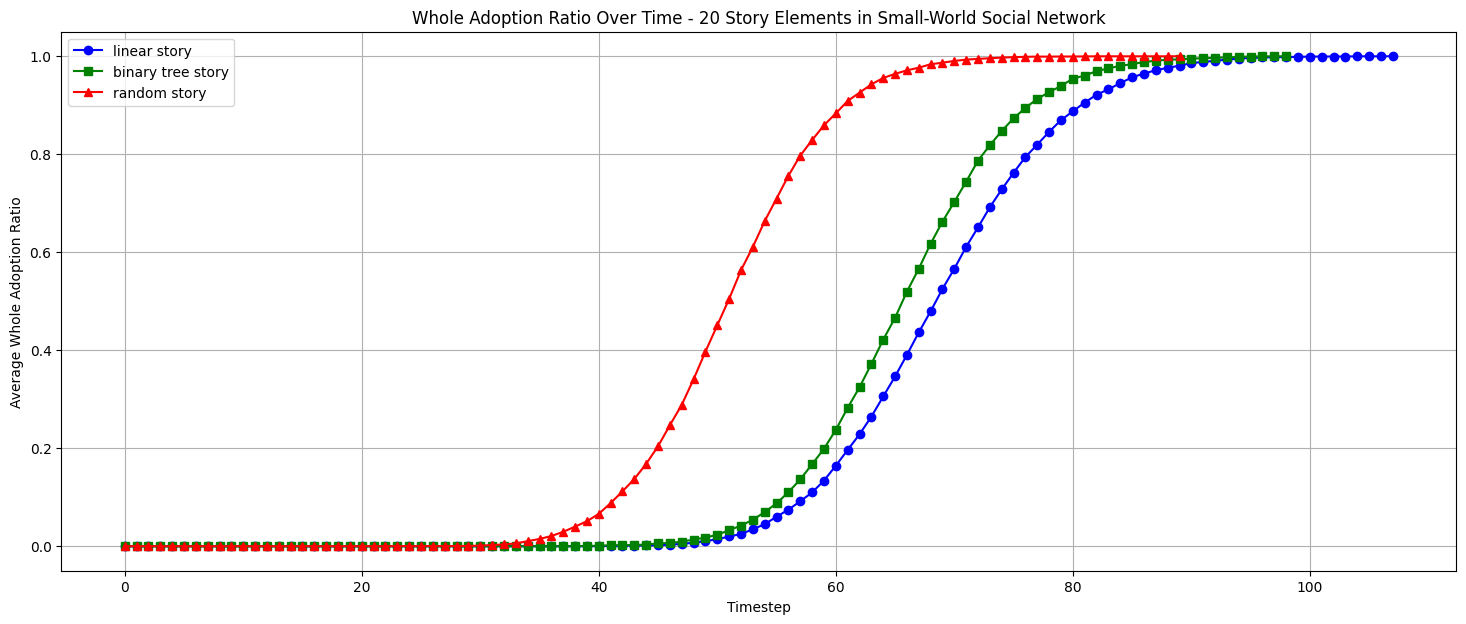

In [4]:
plt.figure(figsize=(18, 7))

plt.plot(sw_linear_data['timestep'], 
         sw_linear_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear story')

plt.plot(sw_binary_data['timestep'], 
         sw_binary_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary tree story')

plt.plot(sw_random_data['timestep'], 
         sw_random_data['whole_adoption_ratio'], 
         marker='^', color='red', label='random story')

plt.title('Whole Adoption Ratio Over Time - 20 Story Elements in Small-World Social Network')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# Caclulate the last adoption propensity for each story structure

def read_parameters_from_file(folder_name):
    params = {}
    datapath = f"../data/20_story_items/{folder_name}/parameters.txt"
    with open(datapath, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            try:
                # Attempt to convert numerical values to float
                params[key] = float(value)
            except ValueError:
                # Keep string values as is
                params[key] = value
    return params

def calculate_narrative_influence(story_graph, target_node, beta, gamma, x_0, x_s):
    adopted_nodes = set(story_graph.nodes()) - {target_node}
    unscaled_W = 0
    for adopted_node in adopted_nodes:
        try:
            distance = nx.shortest_path_length(story_graph, source=target_node, target=adopted_node)
            unscaled_W += 1 / distance
        except nx.NetworkXNoPath:
            continue
    W = 1 / (1 + np.exp(-x_s * (beta + gamma * unscaled_W - x_0)))
    return W

def process_story_graph(folder_name):
    datapath = f"../data/20_story_items/{folder_name}/"
    with open(f"{datapath}story_graph.gpickle", 'rb') as f:
        story_graph = pickle.load(f)

    # Read parameters from file
    params = read_parameters_from_file(folder_name)

    last_adoption_propensity = {}
    for node in story_graph.nodes():
        W = calculate_narrative_influence(story_graph, node, params['beta'], params['gamma'], params['x_0'], params['x_s'])
        last_adoption_propensity[node] = W

    df = pd.DataFrame(list(last_adoption_propensity.items()), columns=['Node', 'LastAdoptionPropensity'])
    return df

# Folders where the gpickle files are located
folders = ["lt_linear", "lt_binary", "lt_random", "sw_linear", "sw_binary", "sw_random"]

for folder in folders:
    # Dynamically create variable names and assign DataFrames to them
    globals()[f"{folder}_propensity"] = process_story_graph(folder)

In [7]:
def load_data(folder_name):
    datapath = f"../data/20_story_items/{folder_name}/results.csv" 
    data = pd.read_csv(datapath)
    return data

def first_adoption_time(data):
    # Filter the dataframe to include only the first adoption instance of each story item by each agent across all trials
    all_trials_adopted = data[data['adopted'] == True].sort_values(by='timestep').drop_duplicates(subset=['Trial', 'agent', 'story_item'], keep='first')
    
    return all_trials_adopted

folders = ["lt_linear", "lt_binary", "lt_random", "sw_linear", "sw_binary", "sw_random"]

for folder in folders:
    variable_name = f"data_{folder}"  
    adoption_time_variable_name = f"adoption_time_{folder}" 
    loaded_data = load_data(folder) 
    globals()[adoption_time_variable_name] = first_adoption_time(loaded_data)

In [12]:
def preprocess_adoption_time(adoption_time_data):
    # Calculate the average time taken to adopt each story item across all trials, based on the first adoption instance
    average_time_all_trials = adoption_time_data.groupby(['Trial', 'story_item'])['timestep'].mean().reset_index()

    # Now calculate the overall average for each story item across all trials
    overall_average_time = average_time_all_trials.groupby('story_item')['timestep'].mean().reset_index()
    
    return overall_average_time

folders = ["lt_linear", "lt_binary", "lt_random", "sw_linear", "sw_binary", "sw_random"]

for folder in folders:
    adoption_time_variable_name = f"adoption_time_{folder}"  # Name of the variable holding the first adoption time dataframe
    preprocessed_variable_name = f"preprocessed_{folder}"  # Name for the variable to store the preprocessed data
    
    # Retrieve the adoption time dataframe from the dynamically named variable
    adoption_time_data = globals()[adoption_time_variable_name]
    
    # Preprocess the adoption time data to get the overall average time and assign it to a dynamically named variable
    globals()[preprocessed_variable_name] = preprocess_adoption_time(adoption_time_data)


In [19]:
# Merge the first adoption timestep data and the last adoption propensity

# List of prefixes for which to perform the operations
prefixes = ['lt_linear', 'lt_binary', 'lt_random', 'sw_linear', 'sw_binary', 'sw_random']

for prefix in prefixes:
    # Construct DataFrame names based on the prefix
    preprocessed_df_name = f'preprocessed_{prefix}'
    propensity_df_name = f'{prefix}_propensity'
    
    preprocessed_df = locals()[preprocessed_df_name]
    propensity_df = locals()[propensity_df_name]
    
    # Perform the merge operation
    merged_df = pd.merge(preprocessed_df, propensity_df, left_on='story_item', right_on='Node')
    merged_df = merged_df[['story_item', 'timestep', 'LastAdoptionPropensity']]
    
    # Dynamically create a variable name for the merged DataFrame
    merged_df_name = f'merged_{prefix}'
    
    # Assign the merged DataFrame to a variable with the dynamically created name
    globals()[merged_df_name] = merged_df

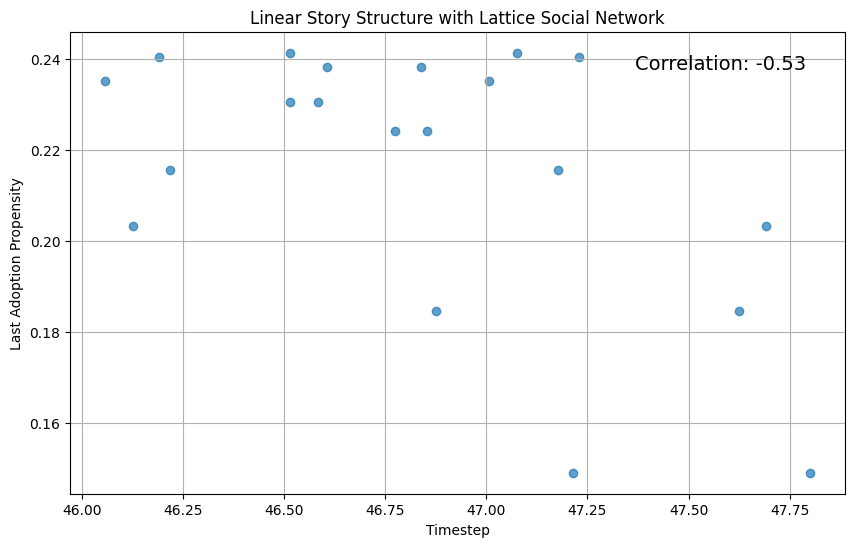

In [32]:
# Calculate the Pearson correlation coefficient
correlation = merged_lt_linear['timestep'].corr(merged_lt_linear['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_lt_linear['timestep'], merged_lt_linear['LastAdoptionPropensity'], alpha=0.7)
plt.title('Linear Story Structure with Lattice Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

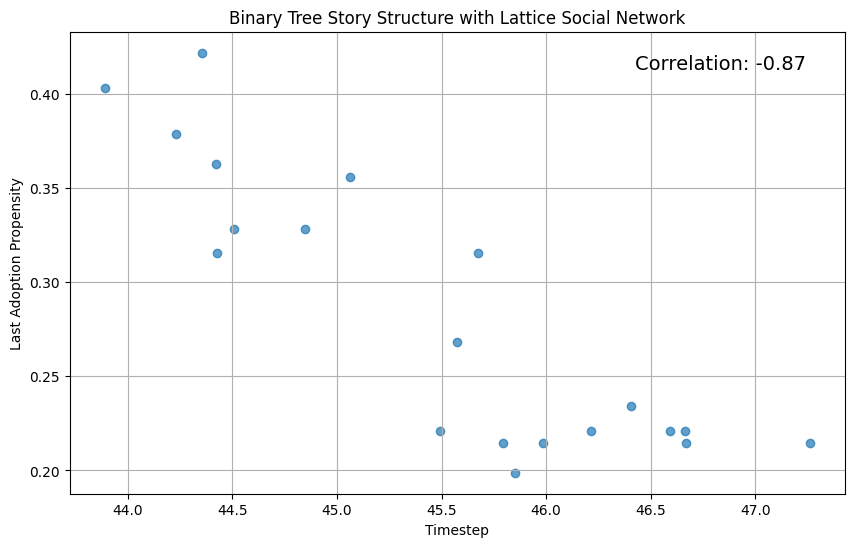

In [31]:
# Calculate the Pearson correlation coefficient
correlation = merged_lt_binary['timestep'].corr(merged_lt_binary['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_lt_binary['timestep'], merged_lt_binary['LastAdoptionPropensity'], alpha=0.7)
plt.title('Binary Tree Story Structure with Lattice Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

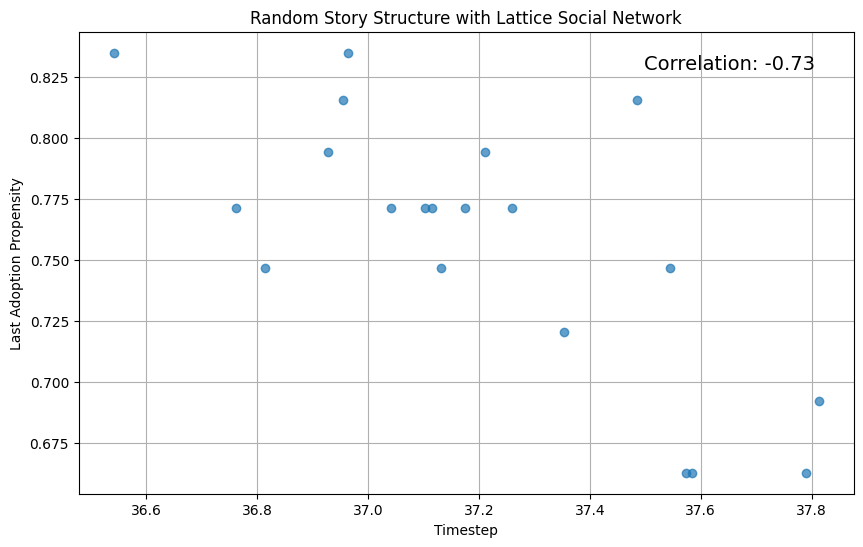

In [30]:
# Calculate the Pearson correlation coefficient
correlation = merged_lt_random['timestep'].corr(merged_lt_random['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_lt_random['timestep'], merged_lt_random['LastAdoptionPropensity'], alpha=0.7)
plt.title('Random Story Structure with Lattice Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

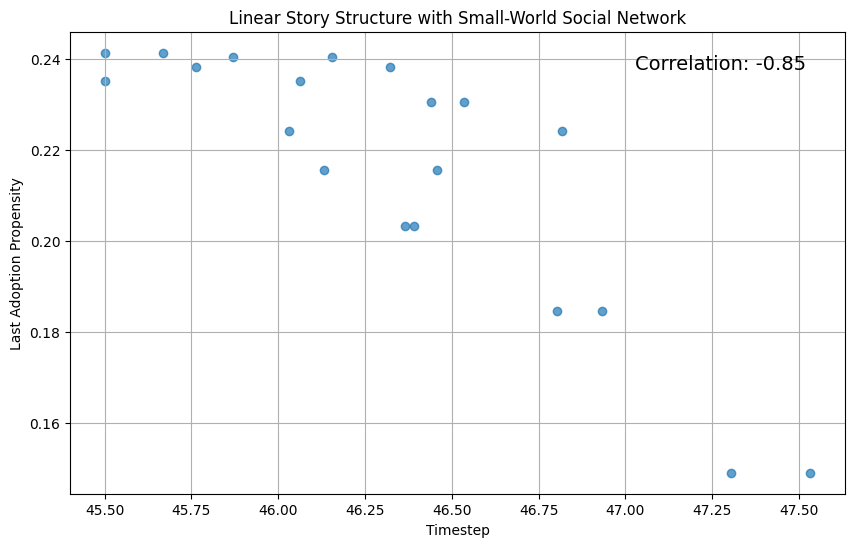

In [29]:
# Calculate the Pearson correlation coefficient
correlation = merged_sw_linear['timestep'].corr(merged_sw_linear['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_sw_linear['timestep'], merged_sw_linear['LastAdoptionPropensity'], alpha=0.7)
plt.title('Linear Story Structure with Small-World Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

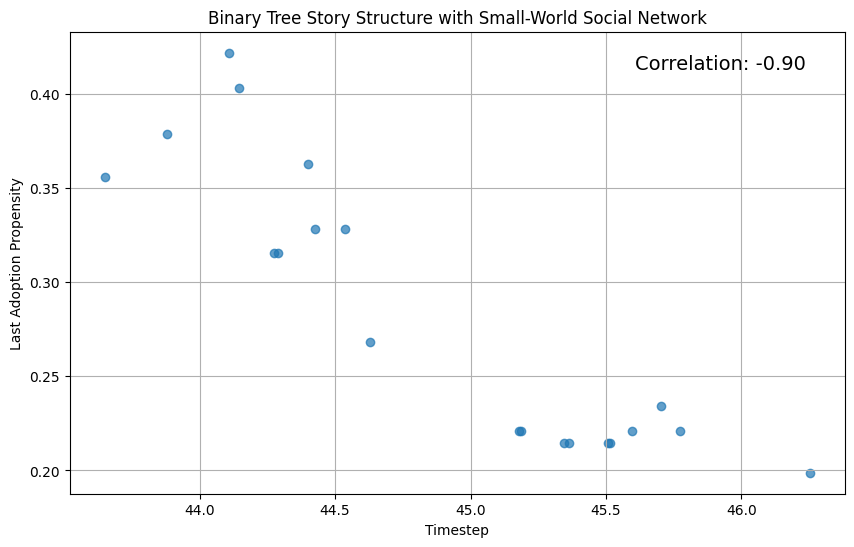

In [28]:
# Calculate the Pearson correlation coefficient
correlation = merged_sw_binary['timestep'].corr(merged_sw_binary['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_sw_binary['timestep'], merged_sw_binary['LastAdoptionPropensity'], alpha=0.7)
plt.title('Binary Tree Story Structure with Small-World Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

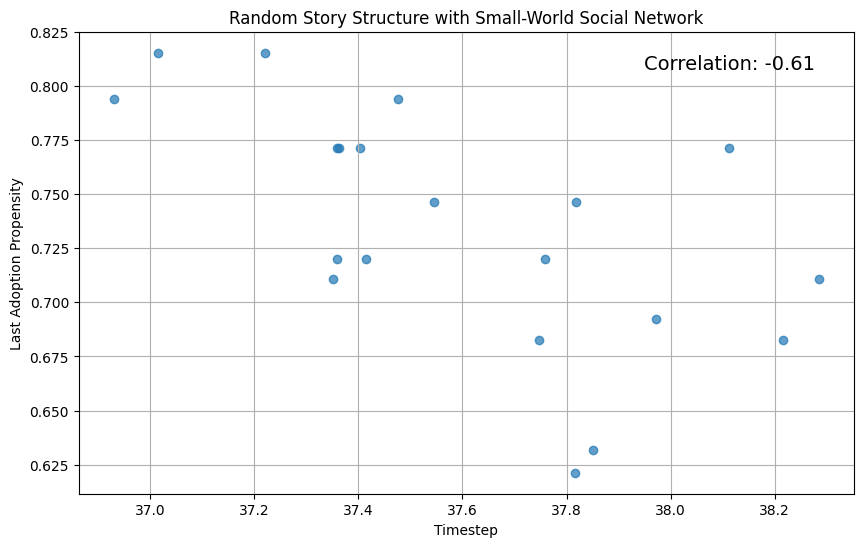

In [33]:
# Calculate the Pearson correlation coefficient
correlation = merged_sw_random['timestep'].corr(merged_sw_random['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_sw_random['timestep'], merged_sw_random['LastAdoptionPropensity'], alpha=0.7)
plt.title('Random Story Structure with Small-World Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()


In [34]:
# Merge dataframes to make different combination of them

# Concatenate DataFrames for merged_lt and merged_sw
merged_lt = pd.concat([merged_lt_linear, merged_lt_binary, merged_lt_random], ignore_index=True)
merged_sw = pd.concat([merged_sw_linear, merged_sw_binary, merged_sw_random], ignore_index=True)

# Concatenate DataFrames for merged_linear, merged_binary, and merged_random
merged_linear = pd.concat([merged_lt_linear, merged_sw_linear], ignore_index=True)
merged_binary = pd.concat([merged_lt_binary, merged_sw_binary], ignore_index=True)
merged_random = pd.concat([merged_lt_random, merged_sw_random], ignore_index=True)

# Concatenate all six DataFrames for merged_all
merged_all = pd.concat([
    merged_lt_linear, merged_lt_binary, merged_lt_random,
    merged_sw_linear, merged_sw_binary, merged_sw_random
], ignore_index=True)

# Now you have all the additional merged DataFrames as required.


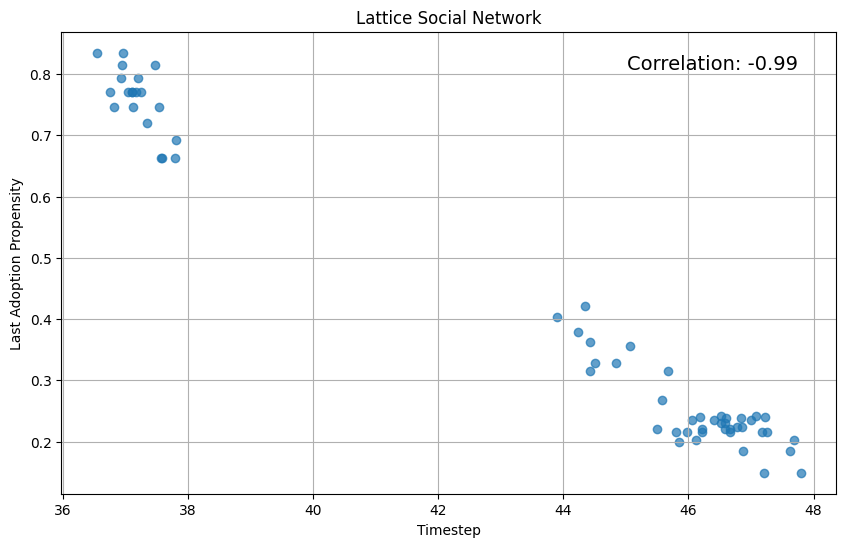

In [35]:
# Calculate the Pearson correlation coefficient
correlation = merged_lt['timestep'].corr(merged_lt['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_lt['timestep'], merged_lt['LastAdoptionPropensity'], alpha=0.7)
plt.title('Lattice Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

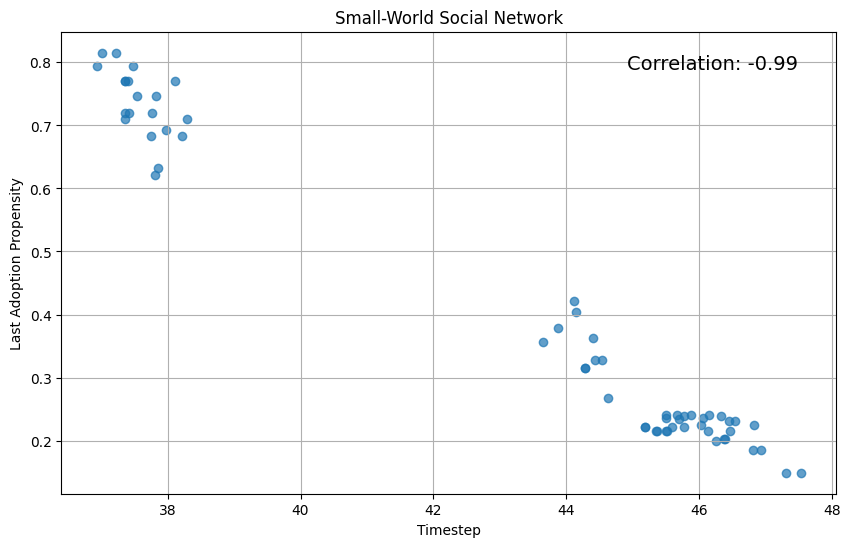

In [37]:
# Calculate the Pearson correlation coefficient
correlation = merged_sw['timestep'].corr(merged_sw['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_sw['timestep'], merged_sw['LastAdoptionPropensity'], alpha=0.7)
plt.title('Small-World Social Network')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

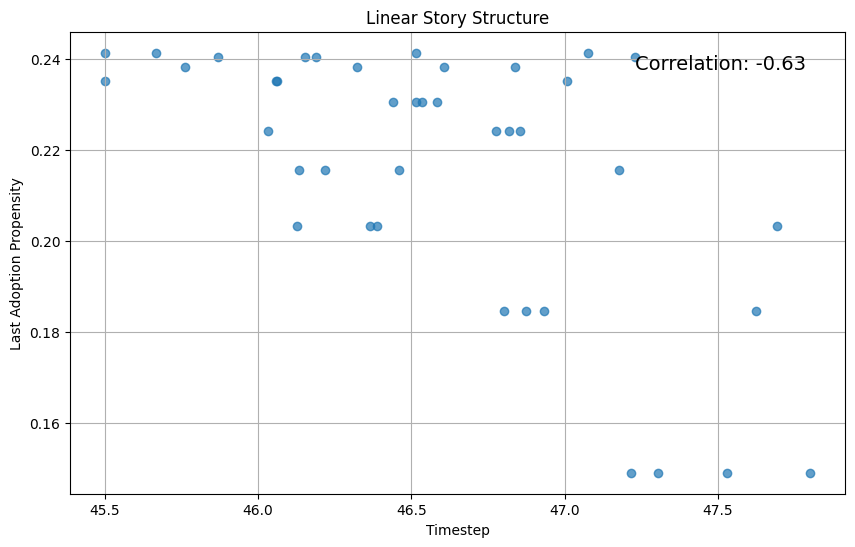

In [39]:
# Calculate the Pearson correlation coefficient
correlation = merged_linear['timestep'].corr(merged_linear['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_linear['timestep'], merged_linear['LastAdoptionPropensity'], alpha=0.7)
plt.title('Linear Story Structure')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

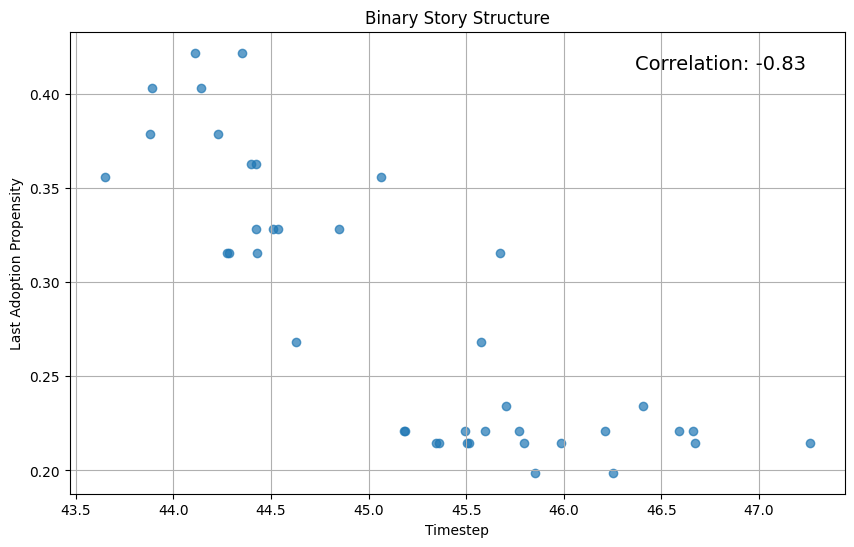

In [40]:
# Calculate the Pearson correlation coefficient
correlation = merged_binary['timestep'].corr(merged_binary['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_binary['timestep'], merged_binary['LastAdoptionPropensity'], alpha=0.7)
plt.title('Binary Story Structure')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

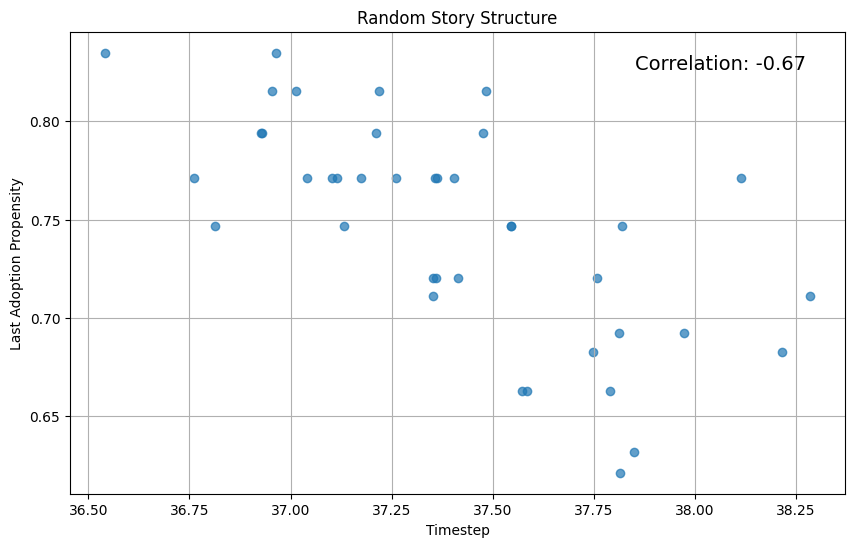

In [41]:
# Calculate the Pearson correlation coefficient
correlation = merged_random['timestep'].corr(merged_random['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_random['timestep'], merged_random['LastAdoptionPropensity'], alpha=0.7)
plt.title('Random Story Structure')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()

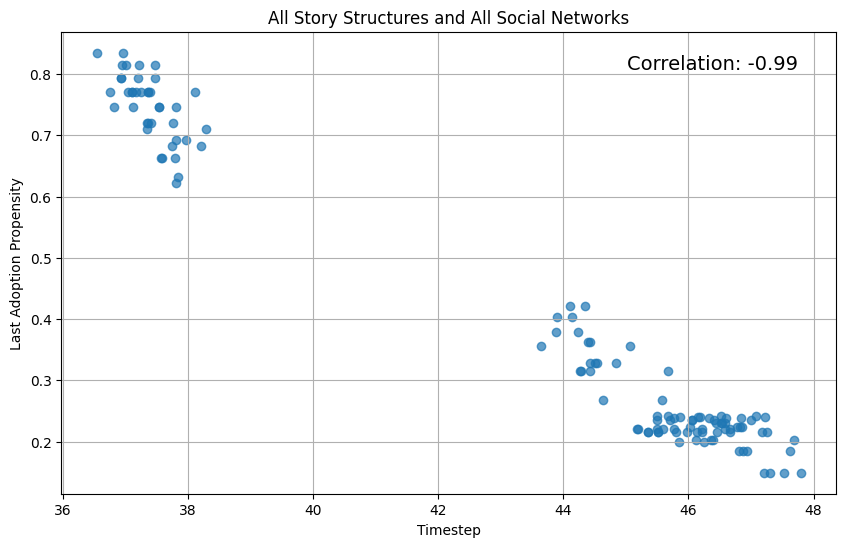

In [44]:
# Calculate the Pearson correlation coefficient
correlation = merged_all['timestep'].corr(merged_all['LastAdoptionPropensity'])

# Create a scatter plot of 'timestep' vs 'LastAdoptionPropensity'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(merged_all['timestep'], merged_all['LastAdoptionPropensity'], alpha=0.7)
plt.title('All Story Structures and All Social Networks')
plt.xlabel('Timestep')
plt.ylabel('Last Adoption Propensity')
plt.grid(True)  # Add a grid

# Add the correlation value as text
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', fontsize=14, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.show()